In [106]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


Real_Estate_data_df = pd.read_csv('USA Real Estate Dataset new.csv')

Real_Estate_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,33968.0,for_sale,99000.0,1.0,1.0,5.0,49388.0,Terlingua,Texas,79852,600.0,NaN
1,88188.0,for_sale,58800.0,NaN,NaN,1.0,841041.0,Orange,Texas,77632,NaN,NaN
2,88188.0,for_sale,58800.0,NaN,NaN,1.0,844563.0,Orange,Texas,77632,NaN,NaN
3,88188.0,for_sale,58800.0,NaN,NaN,1.0,845421.0,Orange,Texas,77632,NaN,NaN
4,88188.0,for_sale,58800.0,NaN,NaN,1.0,859147.0,Orange,Texas,77632,NaN,NaN


In [107]:
columns_to_drop_na = ['bed', 'bath', 'house_size', 'prev_sold_date']  # Specify the columns where you want to drop NA values
Clean_Real_Estate_data_df = Real_Estate_data_df.dropna(subset=columns_to_drop_na)
# Display the cleaned DataFrame
print(Clean_Real_Estate_data_df.head())

    brokered_by    status     price  bed  bath  acre_lot    street  \
18      22959.0  for_sale  349000.0  6.0   5.0      4.41  307395.0   
19     106174.0  for_sale  249500.0  2.0   2.0      1.19  363547.0   
23       4317.0  for_sale  479000.0  5.0   4.0      6.28  840246.0   
26     100789.0  for_sale  499000.0  4.0   3.0       NaN  230632.0   
27     100789.0  for_sale  179900.0  3.0   2.0      2.23  439804.0   

          city  state  zip_code  house_size prev_sold_date  
18      Newton  Texas     75966      5888.0     2014-06-17  
19    Hemphill  Texas     75948      1872.0     2022-04-28  
23      Newton  Texas     75966      4248.0     2022-05-06  
26  Burkeville  Texas     75932      2320.0     2022-09-26  
27  Burkeville  Texas     75932      1240.0     2022-01-28  


In [108]:
#House size

Real_Estate_data_df['house_size'].unique()

array([ 600.,   nan, 2300., ..., 5408.,  899., 4345.])

In [110]:
# Step 2: Data Cleaning
# Drop rows with missing target ('price') values
Real_Estate_data_df = Real_Estate_data_df.dropna(subset=['price'])

In [111]:
#Checking the number of datapoints after cleaning
print(Real_Estate_data_df.shape)

(40053, 12)


In [112]:
# Convert prev_sold_date to datetime
Real_Estate_data_df['prev_sold_date'] = pd.to_datetime(Real_Estate_data_df['prev_sold_date'])

In [113]:
#zip code should be in type of string or integer
#I found string will be better because the infomation it contains a area.
Real_Estate_data_df['zip_code'] = Real_Estate_data_df['zip_code'].astype(str)

In [114]:
missing_rows = Real_Estate_data_df[Real_Estate_data_df.isnull().any(axis=1)]
print(missing_rows)

       brokered_by    status     price  bed  bath  acre_lot     street  \
0          33968.0  for_sale   99000.0  1.0   1.0      5.00    49388.0   
1          88188.0  for_sale   58800.0  NaN   NaN      1.00   841041.0   
2          88188.0  for_sale   58800.0  NaN   NaN      1.00   844563.0   
3          88188.0  for_sale   58800.0  NaN   NaN      1.00   845421.0   
4          88188.0  for_sale   58800.0  NaN   NaN      1.00   859147.0   
...            ...       ...       ...  ...   ...       ...        ...   
40106      68915.0  for_sale  467847.0  5.0   4.0      0.19   773587.0   
40107      68915.0  for_sale  345249.0  5.0   3.0      0.19   772323.0   
40108      61150.0  for_sale  325000.0  NaN   NaN      0.68  1024251.0   
40109      68915.0  for_sale  456122.0  5.0   4.0      0.19   273557.0   
40110      61150.0  for_sale  325000.0  NaN   NaN      0.69  1024490.0   

                 city  state zip_code  house_size prev_sold_date  
0           Terlingua  Texas    79852       

In [115]:
# summary statistics
print(Real_Estate_data_df.describe())

         brokered_by         price           bed          bath      acre_lot  \
count   40035.000000  4.005300e+04  28703.000000  27158.000000  36224.000000   
mean    52676.266742  4.856361e+05      3.476327      2.678548     11.630184   
min        51.000000  0.000000e+00      1.000000      1.000000      0.000000   
25%     26917.000000  1.800000e+05      3.000000      2.000000      0.170000   
50%     52387.000000  3.400000e+05      3.000000      2.000000      0.340000   
75%     78016.000000  5.199000e+05      4.000000      3.000000      2.010000   
max    110142.000000  3.468000e+07     99.000000     25.000000   7085.560000   
std     29782.067243  8.704503e+05      1.338834      1.212267    106.481943   

             street    house_size                 prev_sold_date  
count  3.994600e+04  28845.000000                          15315  
mean   1.061438e+06   2313.505114  2014-05-03 11:55:09.461312512  
min    2.300000e+01    100.000000            1979-01-01 00:00:00  
25%    5.33

In [116]:
# Check the value counts
print(Real_Estate_data_df['status'].value_counts())

status
for_sale          38497
ready_to_build     1556
Name: count, dtype: int64


In [117]:
# checking for missing values
print(Real_Estate_data_df.isnull().sum())

brokered_by          18
status                0
price                 0
bed               11350
bath              12895
acre_lot           3829
street              107
city                 17
state                 0
zip_code              0
house_size        11208
prev_sold_date    24738
dtype: int64


In [118]:
# Checking for duplicates
print(Real_Estate_data_df.duplicated().sum())

0


Perfect Model: The model made zero errors, with all predictions perfectly matching the actual class labels for both class 0 and class 1. This is reflected in the confusion matrix, classification report, and accuracy score.

Overfitting Concern: Achieving a perfect score is often a sign of overfitting (especially on test data), meaning the model may have memorized the training data rather than learning general patterns. In real-world scenarios, it is uncommon for models to achieve perfect classification, and caution should be taken when interpreting these results

In [119]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt


In [120]:
# Import the TargetEncoder
from category_encoders import TargetEncoder

In [122]:
# Convert 'zip_code' to string for encoding purposes
Real_Estate_data_df['zip_code'] = Real_Estate_data_df['zip_code'].astype(str)

In [125]:

# Ensure the target variable is suitable for classification
# Example: Converting 'status' to a binary classification (e.g., 'for_sale' vs. 'not_for_sale')
Real_Estate_data_df['status_binary'] = (Real_Estate_data_df['status'] == 'for_sale').astype(int)


In [126]:

# Feature Engineering
# Create meaningful interaction terms

Real_Estate_data_df['price_per_bedroom'] =Real_Estate_data_df['price'] / Real_Estate_data_df['bed']
Real_Estate_data_df['price_per_bathroom'] = Real_Estate_data_df['price'] / Real_Estate_data_df['bath']


In [127]:
## Target Encoding for high-cardinality categorical variables
target_encoder = TargetEncoder()
Real_Estate_data_df['city_encoded'] = target_encoder.fit_transform(Real_Estate_data_df['city'], Real_Estate_data_df['status_binary'])
Real_Estate_data_df['state_encoded'] = target_encoder.fit_transform(Real_Estate_data_df['state'], Real_Estate_data_df['status_binary'])

In [128]:

# Feature Scaling
scaler = StandardScaler()
Real_Estate_data_df[['acre_lot_scaled', 'house_size_scaled']] = scaler.fit_transform(Real_Estate_data_df[['acre_lot', 'house_size']])


In [129]:

# Prepare the data for modeling
X = Real_Estate_data_df.drop(['price', 'status', 'status_binary', 'city', 'state', 'prev_sold_date'], axis=1, errors='ignore')
y = Real_Estate_data_df['status_binary']  # Binary target variable


In [130]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [131]:
# Set up the Decision Tree Classifier model with a pipeline for scaling
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

In [132]:

# Hyperparameters to tune
param_grid = {
    'dt__max_depth': [None, 10, 20, 30, 40, 50],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy']
}

In [133]:

# Perform GridSearchCV to find the best hyperparameters
grid_search_dt = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 10, 20, 30, 40, 50],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [134]:
# Best parameters and model performance
best_dt_model = grid_search_dt.best_estimator_
print(f"Best Hyperparameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best Cross-Validation Accuracy for Decision Tree: {grid_search_dt.best_score_}")


Best Hyperparameters for Decision Tree: {'dt__criterion': 'gini', 'dt__max_depth': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Best Cross-Validation Accuracy for Decision Tree: 0.9999375828973338


In [135]:

# Evaluate the Decision Tree model on the test set
y_pred_dt = best_dt_model.predict(X_test)


In [136]:
# Model evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))


Confusion Matrix:
 [[ 321    0]
 [   0 7690]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00      7690

    accuracy                           1.00      8011
   macro avg       1.00      1.00      1.00      8011
weighted avg       1.00      1.00      1.00      8011

Accuracy Score: 1.0


In [137]:
# Evaluate using cross-validation for more robust performance metrics
cv_scores_dt = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Accuracy Scores: {cv_scores_dt}")
print(f"Mean Accuracy Score: {cv_scores_dt.mean()}")


Decision Tree Cross-Validation Accuracy Scores: [0.99984397 1.         1.         0.99984395 1.        ]
Mean Accuracy Score: 0.9999375828973338


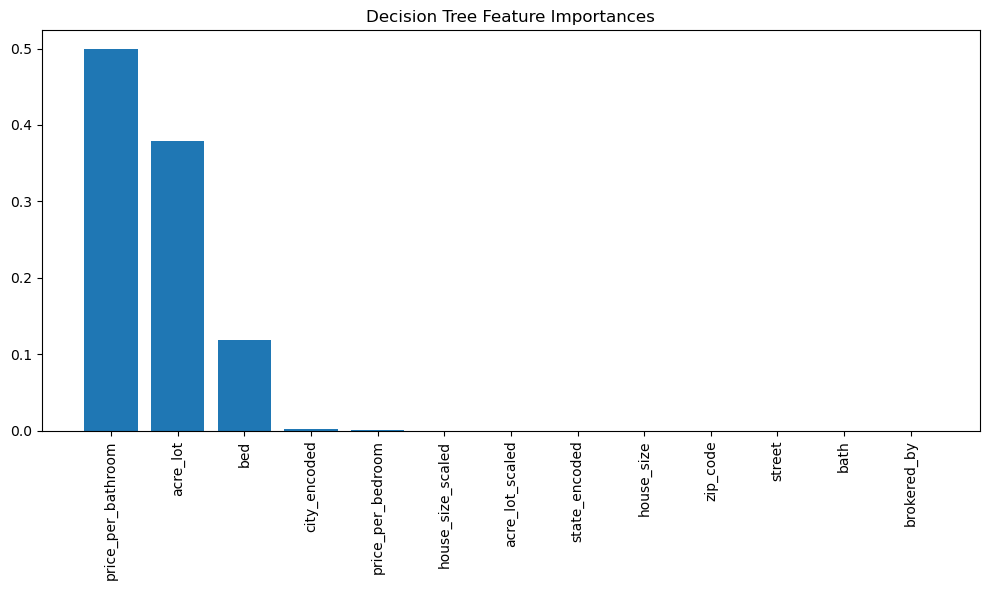

In [138]:
# Plotting feature importance
if hasattr(best_dt_model.named_steps['dt'], 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feature_importances = best_dt_model.named_steps['dt'].feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]
    plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
    plt.title('Decision Tree Feature Importances')
    plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    plt.show()

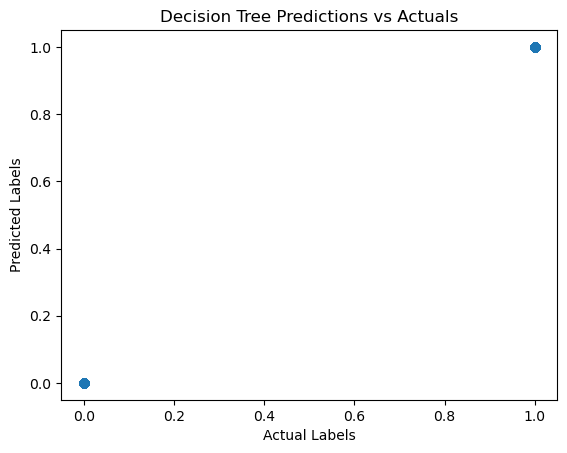

In [139]:

# Optional: Plotting predictions vs actuals for binary classification
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.title('Decision Tree Predictions vs Actuals')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [157]:
# Prepare the data for modeling
X = Real_Estate_data_df.drop(['price', 'city', 'state', 'prev_sold_date'], axis=1, errors='ignore')
y = Real_Estate_data_df['price']


In [158]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
# Hyperparameters to tune
param_grid = {
    'dt__max_depth': [None, 10, 20, 30, 40, 50],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

#Check correlation between features and price.
Select Relevant Features: Focus on numerical features such as bed, bath, acre_lot, house_size, etc.
Compute Correlation Coefficients: Use Pearson correlation to measure the linear relationship between price and each feature.
Visualize Correlations: Optionally, visualize the correlations using a heatmap for a more intuitive understanding.

In [17]:
# Compute the correlation matrix for numerical features including 'price'
numerical_features = ['price', 'bed', 'bath', 'acre_lot', 'house_size']

In [18]:
# Ensure all required features exist in the dataset
available_features = [feature for feature in numerical_features if feature in Real_Estate_data_df.columns]


In [19]:
# Calculate the correlation matrix
correlation_matrix = Real_Estate_data_df[available_features].corr()


In [20]:
# Display the correlation with 'price'
print("Correlation of features with 'price':")
print(correlation_matrix['price'].sort_values(ascending=False))

Correlation of features with 'price':
price         1.000000
house_size    0.601049
bath          0.523329
acre_lot      0.400369
bed           0.291552
Name: price, dtype: float64


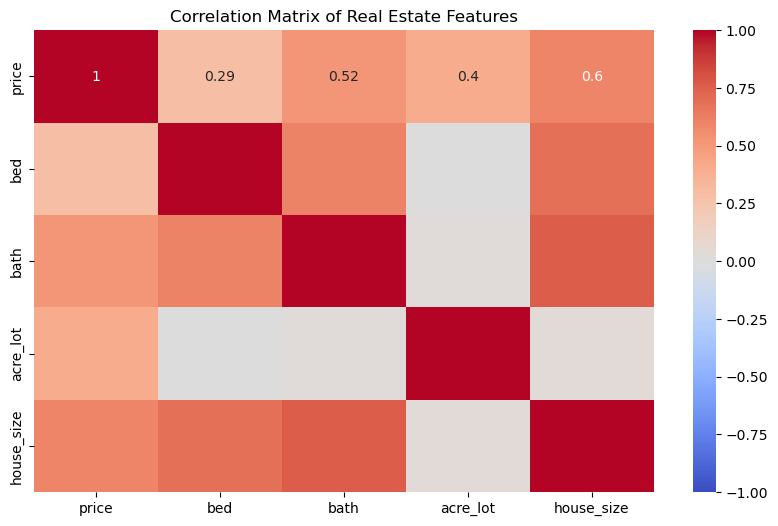

In [21]:
#  Visualize the correlation matrix using a heatmap The more features higher price
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Real Estate Features')
plt.show()

#Feature Techniques

Creating Interaction Features: Generate new features by combining existing ones. For example, bed * bath could capture the effect of having more bathrooms per bedroom.
Log Transformation: Apply log transformation to skewed features like price or house_size to reduce the effect of outliers and normalize the distribution.
Binning: Convert continuous features into categorical features (bins). For example, you can bin house_size into categories like 'small', 'medium', and 'large'.
Feature Scaling: Normalize or standardize features like acre_lot and house_size to ensure all features contribute equally to the model.
Date Features Extraction: If prev_sold_date or similar date features are available, extract useful information like years_since_last_sold.
Geospatial Features: If latitude and longitude data are available, calculate proximity to landmarks or the city center.

In [22]:
# Step 1: Creating Interaction Features
Real_Estate_data_df['bed_bath_ratio'] = Real_Estate_data_df['bed'] / (Real_Estate_data_df['bath'] + 1)  # Adding 1 to avoid division by zero
Real_Estate_data_df['bedrooms_times_bathrooms'] = Real_Estate_data_df['bed'] * Real_Estate_data_df['bath']


In [23]:
# Step 2: Log Transformation to Handle Skewness
Real_Estate_data_df['log_price'] = np.log1p(Real_Estate_data_df['price'])  # log1p to handle zero values


In [24]:
# Step 3: Binning 'house_size' into categories
bins = [0, 1000, 2000, 3000, np.inf]
labels = ['small', 'medium', 'large', 'extra_large']
Real_Estate_data_df['house_size_category'] = pd.cut(Real_Estate_data_df['house_size'], bins=bins, labels=labels)


In [25]:
# One-hot encode the new categorical feature
Real_Estate_data_df = pd.get_dummies(Real_Estate_data_df, columns=['house_size_category'], drop_first=True)
 


In [26]:
# Step 4: Feature Scaling - Standardize 'acre_lot' and 'house_size'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Real_Estate_data_df[['acre_lot_scaled', 'house_size_scaled']] = scaler.fit_transform(Real_Estate_data_df[['acre_lot', 'house_size']])

In [27]:
# Step 5: Date Features Extraction - Example (if 'prev_sold_date' exists and is useful)
# Uncomment below lines if 'prev_sold_date' is useful for analysis
# real_estate_data['prev_sold_date'] = pd.to_datetime(real_estate_data['prev_sold_date'])
# real_estate_data['years_since_last_sold'] = (pd.Timestamp.now() - real_estate_data['prev_sold_date']).dt.days / 365

# Display the enhanced dataset
print(Real_Estate_data_df.head())


# Proceed to retrain the model with these enhanced features

#NEED CODE TO REMOVE NaN

   brokered_by    status    price  bed  bath  acre_lot    street       city  \
0      33968.0  for_sale  99000.0  1.0   1.0       5.0   49388.0  Terlingua   
1      88188.0  for_sale  58800.0  NaN   NaN       1.0  841041.0     Orange   
2      88188.0  for_sale  58800.0  NaN   NaN       1.0  844563.0     Orange   
3      88188.0  for_sale  58800.0  NaN   NaN       1.0  845421.0     Orange   
4      88188.0  for_sale  58800.0  NaN   NaN       1.0  859147.0     Orange   

   state zip_code  house_size prev_sold_date  bed_bath_ratio  \
0  Texas    79852       600.0            NaN             0.5   
1  Texas    77632         NaN            NaN             NaN   
2  Texas    77632         NaN            NaN             NaN   
3  Texas    77632         NaN            NaN             NaN   
4  Texas    77632         NaN            NaN             NaN   

   bedrooms_times_bathrooms  log_price  house_size_category_medium  \
0                       1.0  11.502885                       False   


In [28]:

# Assume the 'real_estate_data' DataFrame is already prepared with all necessary preprocessing
# Define the target variable and features
X = Real_Estate_data_df.drop(['price'], axis=1)  # Features
y = Real_Estate_data_df['price']  # Target variable

In [29]:
# Check if 'city' is in the DataFrame columns
if 'city' in Real_Estate_data_df.columns:
    # Convert 'city' to a float where 'Fort Worth' is 1.0 and other cities are 0.0
    Real_Estate_data_df['is_fort_worth'] = Real_Estate_data_df['city'].apply(lambda x: 1.0 if x == 'Fort Worth' else 0.0)

    # Optional: Drop the original 'city' column if it's no longer needed
    Real_Estate_data_df.drop('city', axis=1, inplace=True)

# Display the first few rows to verify the conversion
print(Real_Estate_data_df[['is_fort_worth']].head())

   is_fort_worth
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0


In [30]:
# Check if 'state' is in the DataFrame columns
if 'state' in Real_Estate_data_df.columns:
    # Convert 'state' to a float where 'Texas' is 1.0 and other states are 0.0
    Real_Estate_data_df['is_texas'] = Real_Estate_data_df['state'].apply(lambda x: 1.0 if x == 'Texas' else 0.0)

    # Optional: Drop the original 'state' column if it's no longer needed
    Real_Estate_data_df.drop('state', axis=1, inplace=True)

# Display the first few rows to verify the conversion
print(Real_Estate_data_df[['is_texas']].head())

   is_texas
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0


In [31]:


# Convert the date string to a datetime object
date_to_convert = '2007-04-12'
reference_date = pd.to_datetime('1970-01-01')

# Calculate the number of days since the reference date
days_since_reference = (pd.to_datetime(date_to_convert) - reference_date).days

# Convert the result to float
days_since_reference_float = float(days_since_reference)

print(f"Converted float value for date '{date_to_convert}': {days_since_reference_float}")

Converted float value for date '2007-04-12': 13615.0


In [32]:

# Step 1: Prepare the Data
# The DataFrame 'real_estate_data' is already preprocessed, and 'for_sale' is converted to float
# Define features and target variable
X =  Real_Estate_data_df.drop(['price'], axis=1)  # Features (excluding the target 'price')
y =  Real_Estate_data_df['price']  # Target variable


In [40]:
# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:

# Step 3: Initialize the Decision Tree Regressor
# Create a DecisionTreeRegressor instance with default hyperparameters
model = DecisionTreeRegressor(random_state=42)


In [36]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Step 3: Train the Decision Tree Model
model = DecisionTreeRegressor(random_state=42)



In [330]:
#Retraining the Model
# Step 1: Prepare the Enhanced Dataset
# Define the target variable and features (using the enhanced feature set)
X = Real_Estate_data_df.drop(['price'], axis=1)  # Exclude only the original 'price' for prediction
y = Real_Estate_data_df['price']  # Use the original 'price' as target


In [331]:
# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [316]:
# Convert the 'status' feature into a binary format
# Assuming 'status' has values like 'for_sale', 'sold', etc.
Real_Estate_data_df['for_sale'] = (Real_Estate_data_df['status'] == 'for_sale').astype(float)


In [292]:
# Display the first few rows to check the changes
print(Real_Estate_data_df.head())

   brokered_by    price  bed  bath  acre_lot    street       city  state  \
0      33968.0  99000.0  1.0   1.0       5.0   49388.0  Terlingua  Texas   
1      88188.0  58800.0  NaN   NaN       1.0  841041.0     Orange  Texas   
2      88188.0  58800.0  NaN   NaN       1.0  844563.0     Orange  Texas   
3      88188.0  58800.0  NaN   NaN       1.0  845421.0     Orange  Texas   
4      88188.0  58800.0  NaN   NaN       1.0  859147.0     Orange  Texas   

   zip_code  house_size prev_sold_date  bed_bath_ratio  \
0     79852       600.0            NaN             0.5   
1     77632         NaN            NaN             NaN   
2     77632         NaN            NaN             NaN   
3     77632         NaN            NaN             NaN   
4     77632         NaN            NaN             NaN   

   bedrooms_times_bathrooms  log_price  house_size_category_medium  \
0                       1.0  11.502885                       False   
1                       NaN  10.981914                

log transformation and work directly with the original price feature. We will retrain the model using the original price as the target variable.
retrain and evaluate the model using the original price. 

In [ ]:
# Check the value_counts of the target column
Real_Estate_data_df ["status"].value_counts()

status
for_sale          38497
ready_to_build     1614
Name: count, dtype: int64

In [ ]:
#House Size Value Counts
Real_Estate_data_df['house_size'].value_counts()

house_size
1800.0    106
1200.0    102
1216.0     95
1500.0     90
1600.0     90
         ... 
2993.0      1
6883.0      1
3431.0      1
7891.0      1
4345.0      1
Name: count, Length: 4444, dtype: int64

In [ ]:
Real_Estate_data_df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code            int64
house_size        float64
prev_sold_date     object
dtype: object

In [ ]:
# Fill missing numerical values with median
for column in ['bed', 'bath', 'acre_lot', 'house_size']:
    Real_Estate_data_df[column].fillna(Real_Estate_data_df[column].median(), inplace=True)
 

C:\Users\Nat\AppData\Local\Temp\ipykernel_23760\3474507067.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Real_Estate_data_df[column].fillna(Real_Estate_data_df[column].median(), inplace=True)


In [211]:

#House Size by City
Real_Estate_data_df.groupby('city', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,city,house_size
318,Hudson Oaks,16408.000000
686,Westover Hills,7944.000000
684,Westlake,7697.666667
325,Industry,7299.000000
26,Aurora,6546.500000
...,...,...
679,Weinert,NaN
689,Wheelock,NaN
703,Windthorst,NaN
704,Winfield,NaN


In [212]:
X = Real_Estate_data_df[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'city', 'state']]
y = Real_Estate_data_df['price']

# one-hot encode the categorical features
X = pd.get_dummies(X, columns=['city'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [213]:
city_median_prices = Real_Estate_data_df.groupby('city')['price'].median().reset_index()
city_median_prices_median_prices_sorted = city_median_prices.sort_values(by='price')